In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [26]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
recent_date = (session.query(measurement.date).order_by(measurement.date.desc()).first())
recent_date

('2017-08-23',)

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_date

datetime.date(2016, 8, 23)

In [31]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(func.strftime("%Y-%m-%d", measurement.date), measurement.prcp).\
        filter(measurement.date >= '2016-08-23', measurement.date <= '2017-08-23').\
        order_by(measurement.date).all()
prcp_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [32]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns = ['date', 'precipitation'])
prcp_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [33]:
#Set Index
prcp_df.set_index('date', inplace = True)


In [34]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values("date")
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


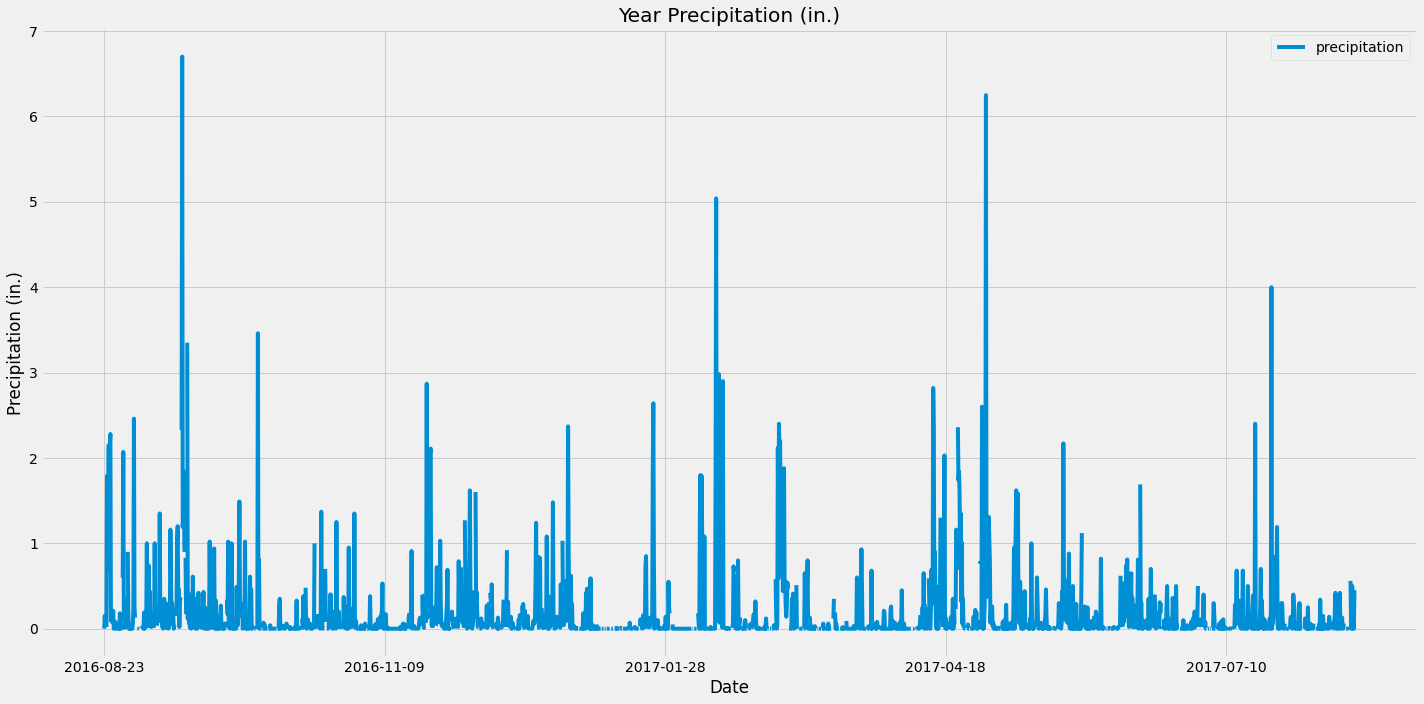

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20,10))
prcp_df.plot(ax = ax, x_compat = True)

#titles
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in.)')
ax.set_title("Year Precipitation (in.)")

plt.savefig("Output/precipitation.png")
plt.tight_layout()
plt.show()

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station.id).distinct().count()
stations

9

In [43]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = (session.query(measurement.station, func.count(measurement.station))
                                  .group_by(measurement.station)
                                  .order_by(func.count(measurement.station).desc()).all())
active_station 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temps = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

session.query(*temps).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

hist = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= one_year_date).order_by(measurement.date.desc()).all()
hist        

[(79.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (83.0,),
 (82.0,),
 (77.0,),
 (76.0,),
 (81.0,),
 (82.0,),
 (81.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (75.0,),
 (82.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (80.0,),
 (76.0,),
 (74.0,),
 (74.0,),
 (72.0,),
 (69.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (81.0,),
 (79.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (71.0,),
 (77.0,),
 (72.0,),
 (72.0,),
 (74.0,),
 (72.0,),
 (72.0,),
 (75.0,),
 (79.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (72.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (75.0,),
 (72.0,),
 (74.0,),
 (80.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (71.0,),
 (74.0,),
 (76.0,),
 (68.0,),
 (69.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (70.0,),
 (74.0,),
 (67.0,),
 (70.0,),
 (75.0,),
 (79.0,),
 (70.0,),
 (75.0,),
 (70.0,),
 (75.0,),


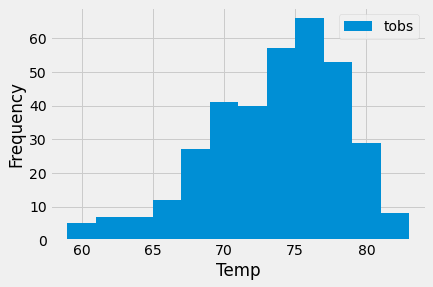

In [53]:
#Plot the hist

x = [x[0] for x in hist]

plt.hist(x,bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temp')
plt.legend(['tobs'])

plt.savefig("Output/Histogram.png")
plt.show()

# Close session

In [21]:
# Close Session
session.close()